# Phishing Website Detection

![](https://i.pinimg.com/originals/8a/84/f6/8a84f6081395d2337e77552ae2998041.jpg?q=60)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing libraries and dataset
5. Classification Models -
    - Logistic Regression
    - Decision Tree Classifier
    - Random forest classifier
    - K-Nearest Neighbouring
    - Support Vector Machine (SVM)
    * Gradient Boosting
    - AdaBoost Classifier
    - XgBoost Classifier
6. Model Comparison
7. Conclusion

### Abstract
Phishing attack is a simplest way to obtain sensitive information from innocent users. Aim of the phishers is to acquire critical information like username, password and bank account details. Cyber security persons are now looking for trustworthy and steady detection techniques for phishing websites detection. This paper deals with machine learning technology for detection of phishing URLs by extracting and analyzing various features of legitimate and phishing URLs. Decision Tree, random forest and Support vector machine algorithms are used to detect phishing websites. Aim of the
paper is to detect phishing URLs as well as narrow down to best machine learning algorithm by comparing accuracy rate, false positive and false negative rate of each algorithm.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/eswarchandt/phishing-website-detector

### Goal
The goal of this project is to make a detection model which will detect the phishing websites depending on various factors, using machine learning algorithms.

### Importing libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("phishing.csv")

In [3]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


**Columns of the dataset**

In [4]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.shape

(11054, 32)

In [7]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

-----------------------------------------------
## Classification Algorithms
Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

There are many different types of classification tasks that you may encounter in machine learning and specialized approaches to modeling that may be used for each.

Here I am going to use 8 Classification algorithms, based on these the models will be trained and then evaluated using the accuracy scores.

**The following models that we are going to use -**
  * **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).
  
  
  * **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
  
  
  * **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. 
  
  
  * **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
  
  
  * **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
 

* **Gradient Boosting** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **AdaBoosting Classifier** : An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.


* **XgBoost Classifier** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

 
We are going to use these ten algorithms and based on the scores of the models the most fitted algorithm will be set! Now let's check out the algorithms.

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train1 and y_train1 are the trainning datasets
  * x_test1 and y_test1 are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [10]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [81]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [12]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


### Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [13]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\my project\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
logreg_predict= model_1.predict(test_X)

In [16]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [17]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [18]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

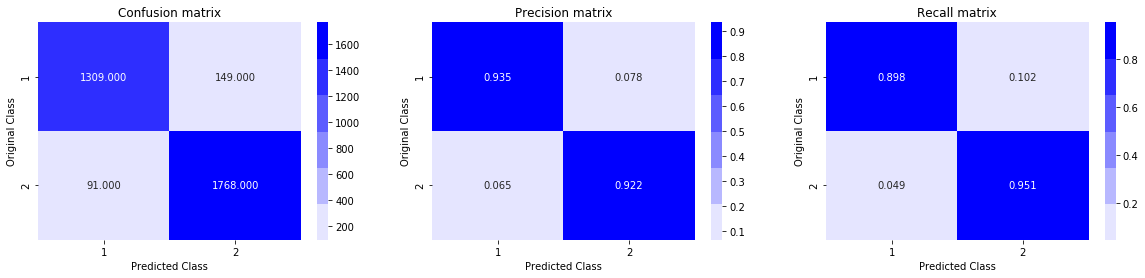

In [19]:
plot_confusion_matrix(test_Y, logreg_predict)

### K-Nearest Neighbours Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [22]:
knn_predict=model_2.predict(test_X)

In [23]:
accuracy_score(knn_predict,test_Y)

0.6352125414531203

In [24]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.64      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.64      0.64      0.64      3317



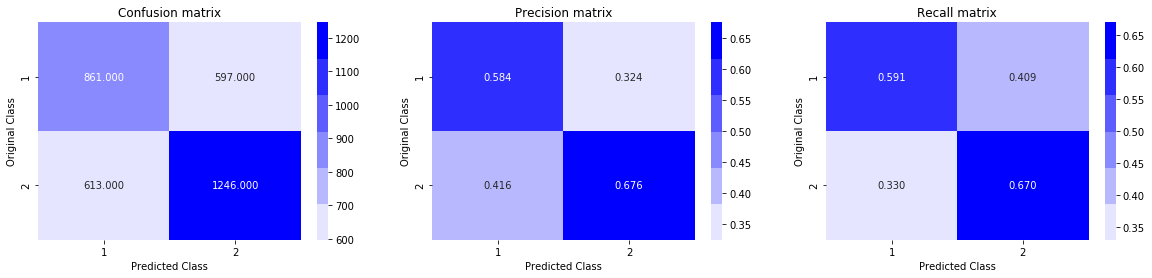

In [25]:
plot_confusion_matrix(test_Y, knn_predict)

### Decision Tree Classifier Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [28]:
dtree_predict=model_3.predict(test_X)

In [29]:
accuracy_score(dtree_predict,test_Y)

0.9472414832680133

In [30]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1417
           1       0.96      0.94      0.95      1900

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



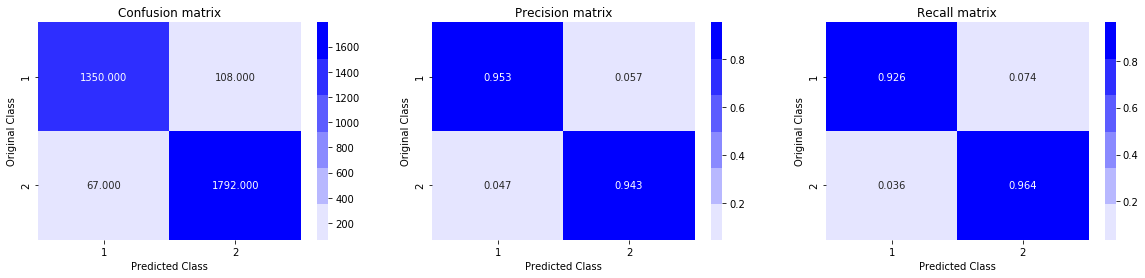

In [31]:
plot_confusion_matrix(test_Y, dtree_predict)

### Random Forest Classifier Algorithm

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

D:\my project\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [34]:
rfc_predict=model_4.predict(test_X)

In [35]:
accuracy_score(rfc_predict,test_Y)

0.9704552306300874

In [36]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1438
           1       0.98      0.97      0.97      1879

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



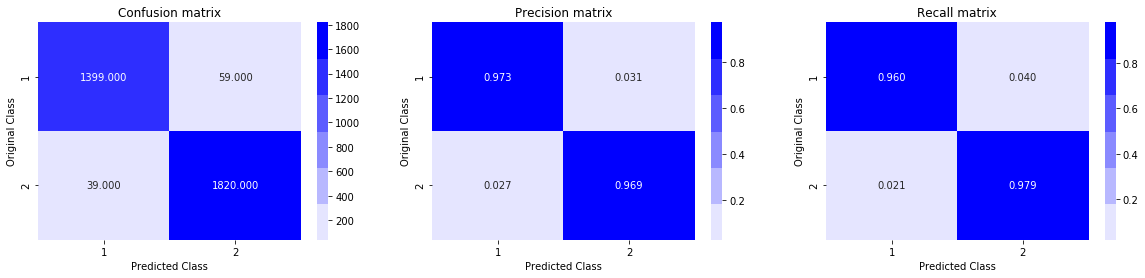

In [37]:
plot_confusion_matrix(test_Y, rfc_predict)

### Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [38]:
from sklearn.svm import SVC

In [39]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
svm_predict=model_5.predict(test_X)

In [41]:
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [42]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



D:\my project\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\my project\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\my project\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D:\my project\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


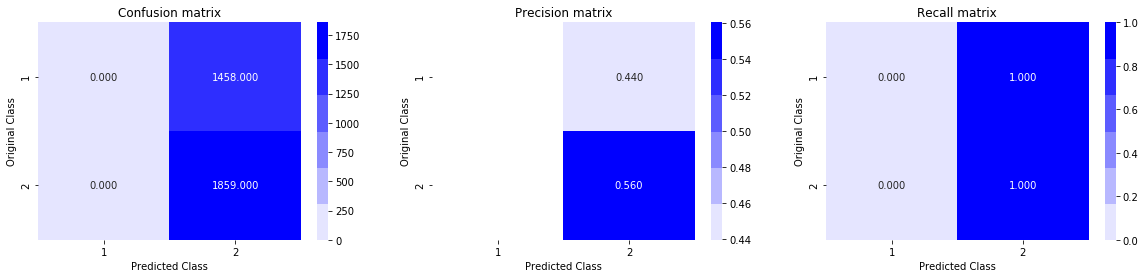

In [43]:
plot_confusion_matrix(test_Y, svm_predict)

### AdaBoost Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
adc_predict=model_6.predict(test_X)

In [47]:
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [48]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



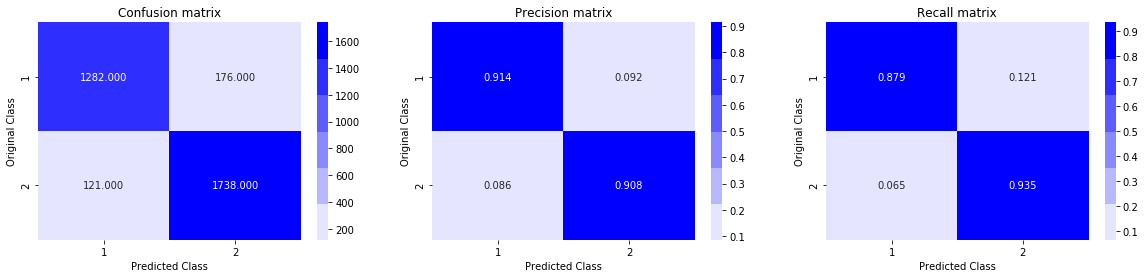

In [49]:
plot_confusion_matrix(test_Y, adc_predict)

### XgBoost Classifier
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
xgb_predict=model_7.predict(test_X)

In [53]:
accuracy_score(xgb_predict,test_Y)

0.9472414832680133

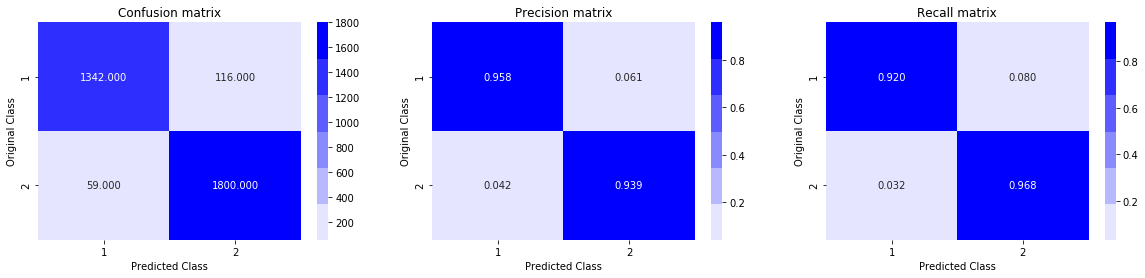

In [54]:
plot_confusion_matrix(test_Y, xgb_predict)

### Gradient Boosting Classifier
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,max_depth=1, random_state=0)

In [83]:
clf.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300,
                           random_state=0)

In [84]:
gb_predict=clf.predict(test_X)

In [85]:
accuracy_score(gb_predict,test_Y)

0.8411214953271028

In [55]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6352125414531203
Decision Tree Classifier Accuracy: 0.9472414832680133
Random Forest Classifier Accuracy: 0.9704552306300874
support Vector Machine Accuracy: 0.5604461863129334
Adaboost Classifier Accuracy: 0.9104612601748568
XGBoost Accuracy: 0.9472414832680133


From all the models we developed , Random forest accuracy has highest accuracy and followed by decision tree and XGBoost. Lowest accuracy model is SVM. 

### Let's try something new about Logistic Regression using two features!

In [56]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

**Here I have chosen Prefix-suffix and AnchorURL as my two attributes**

In [57]:
X=df[['PrefixSuffix-','AnchorURL']]
X.head()

,PrefixSuffix-,AnchorURL
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [58]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [59]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 2)
(3317, 2)
(7737, 1)
(3317, 1)


**Now lets apply logistic Regression for this new model which is having only two features**

In [60]:
model_8=logreg.fit(train_X,train_Y)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [61]:
logreg_predict=model_8.predict(test_X)

In [62]:
accuracy_score(test_Y,logreg_predict)

0.8411214953271028

In [63]:
logreg.classes_

array([-1,  1], dtype=int64)

In [64]:
x = np.array(X)
x

array([[-1,  0],
       [-1,  0],
       [-1,  0],
       ...,
       [-1,  0],
       [-1, -1],
       [-1, -1]], dtype=int64)

In [65]:
X = X.to_numpy()
y = df['class']
y= y.to_numpy()

**Now lets plot the decision boundary**

In [67]:
from mlxtend.plotting import plot_decision_regions

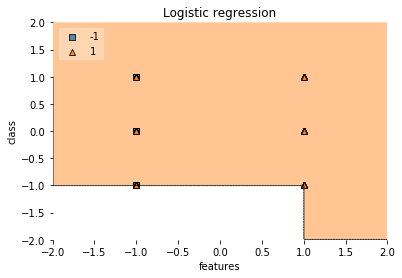

In [68]:
plot_decision_regions(x, y, clf=model_1, legend=2)

# Adding axes annotations
plt.xlabel('features')
plt.ylabel('class')
plt.title('Logistic regression')
plt.show()

-------------------------------------------------
### Model Comparison
We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|92.76|
|Decision Tree Classifier|94.72|
|Random Forest Classifier|97.05|
|KNN Algorithm|63.52|
|Support Vector Machine Algorithm|56.04|
|Gradient Boosting|84.11|
|AdaBoost Classifier|91.04|
|XgBoost Classifier|94.72|
|Logistic Regression on two features|84.11|


### Conclusion
**Comparing all those scores scored by the machine learning algorithms, it is clear that Random Forest and Decision Tree Classifier are having the upper hand in case of this dataset and after this, we can use XgBoost Classifier algorithm, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Random forest classifier
2. Decision tree classifier
3. XgBoost Classifier
4. Logistic Regression
5. AdaBoost classifier
6. Gradient Boosting
7. KNN
8. SVM

Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!